In [1]:
from  google.colab import drive

In [2]:
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import keras

Using TensorFlow backend.


In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Dataset/Train'
valid_path = '/content/drive/My Drive/Dataset/Test'

In [6]:
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
for layer in mobilnet.layers:
    layer.trainable = False

In [8]:
folders = glob('/content/drive/My Drive/Dataset/Train/*')

In [9]:
folders

['/content/drive/My Drive/Dataset/Train/Parasite',
 '/content/drive/My Drive/Dataset/Train/Uninfected']

In [10]:
x = Flatten()(mobilnet.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [16]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
13/13 [==============================] - 246s 19s/step - loss: 1.3732 - accuracy: 0.5721 - val_loss: 0.8310 - val_accuracy: 0.6791
Epoch 2/10
13/13 [==============================] - 8s 646ms/step - loss: 0.6321 - accuracy: 0.6683 - val_loss: 1.1310 - val_accuracy: 0.4328
Epoch 3/10
13/13 [==============================] - 8s 639ms/step - loss: 0.5497 - accuracy: 0.7308 - val_loss: 0.5232 - val_accuracy: 0.7090
Epoch 4/10
13/13 [==============================] - 8s 647ms/step - loss: 0.3624 - accuracy: 0.8462 - val_loss: 0.4690 - val_accuracy: 0.7687
Epoch 5/10
13/13 [==============================] - 8s 647ms/step - loss: 0.3070 - accuracy: 0.8846 - val_loss: 0.5881 - val_accuracy: 0.6716
Epoch 6/10
13/13 [==============================] - 9s 655ms/step - loss: 0.3163 - accuracy: 0.8462 - val_loss: 0.3960 - val_accuracy: 0.7836
Epoch 7/10
13/13 [==============================] - 8s 649ms/step - loss

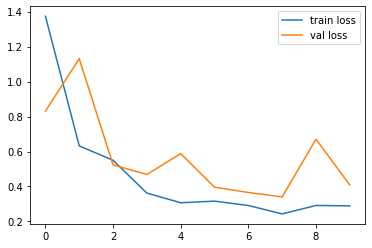

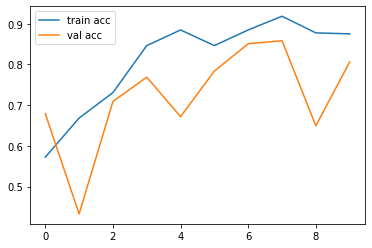

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')